In [80]:
import pandas as pd

In [106]:
data = pd.read_csv("./data/model_data.csv")

In [107]:
data['청구금액_B0'].value_counts()

청구금액_B0
0          676389
1635           34
1784           31
1789           31
1664           31
            ...  
1757549         1
2032328         1
1867959         1
3895624         1
1081197         1
Name: count, Length: 1173861, dtype: int64

In [108]:
data['청구금액_B0'] = data['청구금액_B0'].apply(lambda x: 1 if x == 0 else 0)

In [109]:
data['청구금액_B0'].value_counts() # 1이 이탈고객

청구금액_B0
0    2323611
1     676389
Name: count, dtype: int64

In [110]:
def preprocess_feature(data):
    data['VIP등급코드'] = data['VIP등급코드'].str.replace("_","0").astype(int)
    data['청구금액_B0'] = data['청구금액_B0'].apply(lambda x: 1 if x > 0 else x)
    data['청구금액_B0'] = data['청구금액_B0'].apply(lambda x: 1 if x > 0 else x)
    
    # 이용건수 합치기 예시
    data['이용건수_B0M'] = data[['이용건수_일시불_B0M', '이용건수_체크_B0M', '이용건수_할부_B0M']].sum(axis=1)

    # 이용금액 합치기 예시
    data['이용금액_B0M'] = data[['이용금액_일시불_B0M', '이용금액_체크_B0M', '이용금액_할부_B0M']].sum(axis=1)

    # 이용개월수 합치기 예시
    data['이용개월수_R12M'] = data[['이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_체크_R12M']].sum(axis=1)

    # 유효카드수 합치기 예시
    data['유효카드수_총합'] = data[['유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크']].sum(axis=1)

    # 최종 이용일자 최신값 선택 (datetime이라 .max()가 정확히 동작함)
    data['최종이용일자_종합'] = data[['최종이용일자_일시불', '최종이용일자_체크', '최종이용일자_할부']].max(axis=1)

    # 필요 없는 원본 컬럼 제거 (존재하는 컬럼만)
    cols_to_drop = [
        '이용건수_일시불_B0M', '이용건수_체크_B0M', '이용건수_할부_B0M',
        '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_체크_R12M',
        '이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_체크_R6M',
        '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_체크_R3M',
        '이용금액_일시불_B0M', '이용금액_체크_B0M', '이용금액_할부_B0M',
        '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
        '이용금액_일시불_R6M', '이용금액_할부_R6M', '이용금액_체크_R6M',
        '이용금액_일시불_R3M', '이용금액_할부_R3M', '이용금액_체크_R3M',
        '이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_체크_R12M',
        '이용개월수_일시불_R6M', '이용개월수_할부_R6M', '이용개월수_체크_R6M',
        '이용개월수_일시불_R3M', '이용개월수_할부_R3M', '이용개월수_체크_R3M',
        '유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크',
        '최종이용일자_일시불', '최종이용일자_체크', '최종이용일자_할부',
        '이용금액_R3M_신용체크','탈회횟수_발급1년이내'
    ]
    drop_cols = [col for col in cols_to_drop if col in data.columns]
    data.drop(columns=drop_cols, inplace=True)

    return data


In [111]:
data = preprocess_feature(data)

In [112]:
# def split_date_column(data):
#     # 먼저 10101처럼 잘못된 값을 0으로 처리
#     data['최종이용일자_종합'] = data['최종이용일자_종합'].apply(
#         lambda x: 0 if pd.isnull(x) or x == 10101 else x
#     )

#     # 연, 월, 일 나누기
#     data['최종이용_연도'] = data['최종이용일자_종합'].apply(lambda x: int(str(x)[:4]) if x != 0 else 0)
#     data['최종이용_월'] = data['최종이용일자_종합'].apply(lambda x: int(str(x)[4:6]) if x != 0 else 0)
#     data['최종이용_일'] = data['최종이용일자_종합'].apply(lambda x: int(str(x)[6:8]) if x != 0 else 0)

#     # (선택) 원본 컬럼 제거
#     data.drop(columns=['최종이용일자_종합'], inplace=True)

#     return data


In [113]:
# data = split_date_column(data)

In [114]:
data

,VIP등급코드,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,입회경과개월수_신용,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,...,최대이용금액_일시불_R12M,최대이용금액_할부_R12M,최대이용금액_체크_R12M,이용금액_업종기준,청구금액_B0,이용건수_B0M,이용금액_B0M,이용개월수_R12M,유효카드수_총합,최종이용일자_종합
0,0,2,40,0,0,0,166,0,0,0,...,0,0,0,0,1,1,0,0,2,20180716
1,0,1,30,0,0,0,103,0,0,0,...,19070,0,0,0,1,-1,0,2,4,20170917
2,0,2,60,0,0,0,8,0,0,0,...,301285,0,0,0,1,0,0,4,0,20180102
3,0,2,30,0,0,0,2,2,18,0,...,0,0,0,0,1,-1,0,0,2,10101
4,0,1,40,0,0,0,72,0,0,0,...,0,0,0,0,1,0,0,0,2,20160408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,6,1,40,1,1,0,262,1,45,0,...,2521359,980459,157548,6937435,0,82,2129608,19,14,20180730
2999996,6,1,50,1,1,1,272,0,0,0,...,3659484,0,196841,4944998,0,47,1605615,16,14,20180728
2999997,7,1,30,1,1,1,86,1,96,0,...,4028389,0,0,4011335,0,53,1163258,12,16,20180705
2999998,7,1,40,1,1,1,136,1,100,0,...,6073370,421386,0,8598625,0,69,2413165,13,16,20180731


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 계산
corr_matrix = data.corr().abs()  # 절댓값으로 변환

# 임계값 이상인 변수 쌍 찾기 (예: 0.7 이상)
threshold = 0.7
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                         .stack()
                         .reset_index()
                         .rename(columns={0:'corr'}))

high_corr = high_corr[high_corr['corr'] > threshold]

print(high_corr.sort_values(by='corr', ascending=False))


         level_0         level_1      corr
215  이용금액_R3M_신용       이용금액_업종기준  0.925255
218  이용금액_R3M_신용        이용금액_B0M  0.862249
281    이용금액_업종기준        이용금액_B0M  0.847167
290     이용건수_B0M        이용금액_B0M  0.828606
236    이용후경과월_할부  최대이용금액_할부_R12M  0.733307
147      탈회횟수_누적        최종탈회후경과월  0.707223


In [116]:
X = data.drop(columns = '청구금액_B0')
y = data['청구금액_B0']

In [117]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# # VIF 계산
# vif = pd.DataFrame()
# vif["변수명"] = X.columns
# vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)


In [132]:
data

,VIP등급코드,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,입회경과개월수_신용,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,...,최대이용금액_일시불_R12M,최대이용금액_할부_R12M,최대이용금액_체크_R12M,이용금액_업종기준,청구금액_B0,이용건수_B0M,이용금액_B0M,이용개월수_R12M,유효카드수_총합,최종이용일자_종합
0,0,2,40,0,0,0,166,0,0,0,...,0,0,0,0,1,1,0,0,2,20180716
1,0,1,30,0,0,0,103,0,0,0,...,19070,0,0,0,1,-1,0,2,4,20170917
2,0,2,60,0,0,0,8,0,0,0,...,301285,0,0,0,1,0,0,4,0,20180102
3,0,2,30,0,0,0,2,2,18,0,...,0,0,0,0,1,-1,0,0,2,10101
4,0,1,40,0,0,0,72,0,0,0,...,0,0,0,0,1,0,0,0,2,20160408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,6,1,40,1,1,0,262,1,45,0,...,2521359,980459,157548,6937435,0,82,2129608,19,14,20180730
2999996,6,1,50,1,1,1,272,0,0,0,...,3659484,0,196841,4944998,0,47,1605615,16,14,20180728
2999997,7,1,30,1,1,1,86,1,96,0,...,4028389,0,0,4011335,0,53,1163258,12,16,20180705
2999998,7,1,40,1,1,1,136,1,100,0,...,6073370,421386,0,8598625,0,69,2413165,13,16,20180731


In [133]:
data.to_csv("data.csv",index=False,encoding='utf-8')

In [119]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [120]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
y_pred = rf.predict(X_test)

In [122]:
y_prob = rf.predict_proba(X_test)[:, 1]  # 이진 분류일 때 양성 클래스 확률

In [123]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("정확도:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


정확도: 0.956716
ROC AUC: 0.9895538940705166
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    580903
           1       0.91      0.90      0.90    169097

    accuracy                           0.96    750000
   macro avg       0.94      0.94      0.94    750000
weighted avg       0.96      0.96      0.96    750000



ROC AUC: 0.9895538940705166


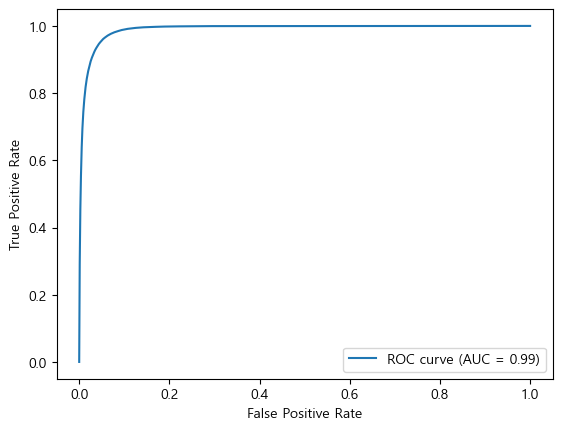

In [124]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [125]:
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, average_precision_score, f1_score, accuracy_score, roc_auc_score
import numpy as np


# 여러 임계값에서 precision, recall, thresholds 계산
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# thresholds 길이는 precisions, recalls 길이보다 1 작으므로, 마지막 값 제외하고 F1 스코어 계산
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-9)

# F1 Score가 최대가 되는 임계값 선택
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"최적의 임계값: {best_threshold:.4f}")

# 최적 임계값으로 클래스 예측
y_test_pred_class = (y_prob >= best_threshold).astype(int)

# 성능 지표 출력
recall = recall_score(y_test, y_test_pred_class)
print(f"Test Recall: {recall:.4f}")

precision = precision_score(y_test, y_test_pred_class)
print(f"Test Precision: {precision:.4f}")

aucpr_score = average_precision_score(y_test, y_prob)
print(f"AUC-PR: {aucpr_score:.4f}")

print(f"F1 Score  : {f1_score(y_test, y_test_pred_class):.4f}")

accuracy = accuracy_score(y_test, y_test_pred_class)
print(f"Accuracy: {accuracy:.4f}")

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")


최적의 임계값: 0.4233
Test Recall: 0.9257
Test Precision: 0.8868
AUC-PR: 0.9593
F1 Score  : 0.9058
Accuracy: 0.9566
ROC-AUC: 0.9896


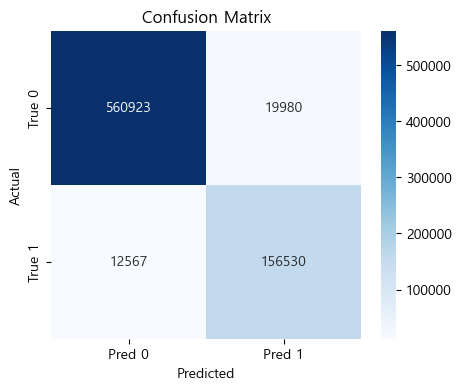

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 예측값과 실제값
cm = confusion_matrix(y_test, y_test_pred_class)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


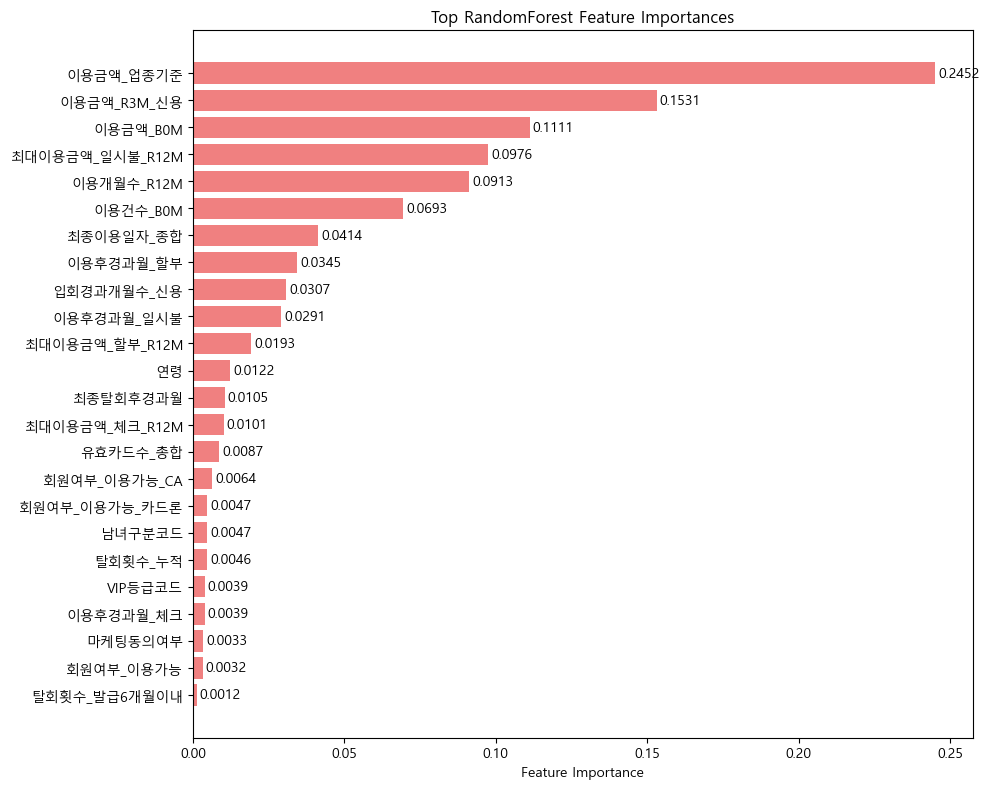

In [127]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우 기준: 'Malgun Gothic', 맥: 'AppleGothic', 리눅스: 'NanumGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'AppleGothic', 'NanumGothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# 중요도 추출
importances = rf.feature_importances_
features = X_train.columns

# DataFrame으로 정리
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 상위 30개만 시각화 (원하는 개수 조절 가능)
top_n = 30
top_features = importance_df.head(top_n)

# Bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features['feature'][::-1], top_features['importance'][::-1], color='lightcoral')

# 수치 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center')

plt.xlabel('Feature Importance')
plt.title('Top RandomForest Feature Importances')
plt.tight_layout()
plt.show()

In [131]:
import joblib
joblib.dump(rf, '95randomforest.pkl')

['95randomforest.pkl']

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {d
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='roc_auc',  # 또는 'accuracy', 'f1' 등
#                            n_jobs=-1,
#                            verbose=1)

# grid_search.fit(X_train, y_train)
# print("최적 하이퍼파라미터:", grid_search.best_params_)

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# y_prob = best_model.predict_proba(X_test)[:, 1]  # ROC AUC용

In [130]:
# from sklearn.metrics import precision_recall_curve, recall_score, precision_score, average_precision_score, f1_score, accuracy_score, roc_auc_score
# import numpy as np


# # 여러 임계값에서 precision, recall, thresholds 계산
# precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# # thresholds 길이는 precisions, recalls 길이보다 1 작으므로, 마지막 값 제외하고 F1 스코어 계산
# f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-9)

# # F1 Score가 최대가 되는 임계값 선택
# best_threshold = thresholds[np.argmax(f1_scores)]
# print(f"최적의 임계값: {best_threshold:.4f}")

# # 최적 임계값으로 클래스 예측
# y_test_pred_class = (y_prob >= best_threshold).astype(int)

# # 성능 지표 출력
# recall = recall_score(y_test, y_test_pred_class)
# print(f"Test Recall: {recall:.4f}")

# precision = precision_score(y_test, y_test_pred_class)
# print(f"Test Precision: {precision:.4f}")

# aucpr_score = average_precision_score(y_test, y_prob)
# print(f"AUC-PR: {aucpr_score:.4f}")

# print(f"F1 Score  : {f1_score(y_test, y_test_pred_class):.4f}")

# accuracy = accuracy_score(y_test, y_test_pred_class)
# print(f"Accuracy: {accuracy:.4f}")

# roc_auc = roc_auc_score(y_test, y_prob)
# print(f"ROC-AUC: {roc_auc:.4f}")

